In [248]:
import numpy as np
import pandas as pd 
import plotly.express as px # used for data visualization
import seaborn as sns 
import matplotlib.pyplot as plt
from textblob import TextBlob #used for sentiment analysis 
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
df = pd.read_csv("netflix_titles.csv")

# Explore Data

In [185]:
df.shape

(8807, 12)

In [186]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [187]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [188]:
x = df.groupby(["rating"]).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


#  visualization of rating

In [189]:
px.pie(x , values="counts" , names="rating" , title='Distribution of count rating')

# Directors Analyst

In [190]:
df["director"] = df["director"].fillna('Director Not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director Not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director Not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director Not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [191]:
director_df = pd.DataFrame()

In [192]:
director_df = df["director"].str.split(',' , expand=True).stack()

In [193]:
director_df

0     0           Kirsten Johnson
1     0    Director Not specified
2     0           Julien Leclercq
3     0    Director Not specified
4     0    Director Not specified
                    ...          
8802  0             David Fincher
8803  0    Director Not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object

In [194]:
director_df = director_df.to_frame()

In [195]:
director_df.columns = ['Director']

In [196]:
directors = director_df.groupby(['Director']).size().reset_index(name='Total count')

In [197]:
directors

,Director,Total count
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
5116,Çagan Irmak,1
5117,Ísold Uggadóttir,1
5118,Óskar Thór Axelsson,1
5119,Ömer Faruk Sorak,2


In [198]:
directors = directors[directors.Director != 'Director Not specified']

In [199]:
directors

,Director,Total count
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
5116,Çagan Irmak,1
5117,Ísold Uggadóttir,1
5118,Óskar Thór Axelsson,1
5119,Ömer Faruk Sorak,2


In [200]:
directors = directors.sort_values(by=['Total count'] , ascending = False)

In [201]:
directors.head()

,Director,Total count
4021,Rajiv Chilaka,22
4068,Raúl Campos,18
261,Jan Suter,18
4652,Suhas Kadav,16
3236,Marcus Raboy,16


In [202]:
top5 = directors.head()

In [203]:
top5 = top5.sort_values(by=['Total count'])
px.bar(top5 , x= 'Total count' , y = 'Director' , title='Top 5 Directors')

# Top 5 Actors

In [204]:
df['cast'] = df['cast'].fillna('no cast specified')
cast_df = pd.DataFrame()
cast_df = df['cast'].str.split(',' , expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']
actors = cast_df.groupby(['Actor']).size().reset_index(name= 'Total Count')
actors = actors[actors.Actor != 'no cast specified']
actors = actors.sort_values(by = ['Total Count'] , ascending=False)
top5_act = actors.head()
top5_act = top5_act.sort_values(by=['Total Count'])
px.bar(top5_act , x='Total Count' , y = 'Actor' , title='Top 5 Actors')

## Analyzing the content produced on netflix based on years

In [205]:
df1 = df[['type' , 'release_year']]
df1 = df1.rename(columns = {'release_year': "Release Year",
                            'type' : 'Type'})
df2 = df1.groupby(['Release Year' , 'Type']).size().reset_index(name='Total Count')


In [206]:
df2

,Release Year,Type,Total Count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


In [207]:
px.line(df2 ,x=  'Release Year' , y="Total Count" , color = 'Type' , title = 'Trend of Content Produced on Netflix ')

In [208]:
df2 = df2[df2['Release Year'] >2000]
px.line(df2 ,x=  'Release Year' , y="Total Count" , color = 'Type' , title = 'Trend of Content Produced on Netflix ')

In [209]:
top5_co = df["country"].value_counts()
top5_co = top5_co.head().to_frame()
px.bar(top5_co , x=top5_co.index , y = top5_co.columns , title='Top 5 Country')


In [210]:

import pycountry

# Helper function to get ISO Alpha-3 country codes from country names
def get_iso_alpha(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Apply the function to the 'country' column to create 'iso_alpha'
df['iso_alpha'] = df['country'].apply(get_iso_alpha)

# Filter out rows where iso_alpha is NaN (if needed)
df4 = df.dropna(subset=['iso_alpha'])

# Now plot using 'iso_alpha' as locations
px.scatter_geo(df4, locations='iso_alpha', size='release_year', color='country',
               title='Country Scatter Geo Plot')


In [211]:
country_df = pd.DataFrame()
country_df = df['country']
country_df = country_df.to_frame()
country_df.columns = ['Country']
countries = country_df.groupby(['Country']).size().reset_index(name= 'Total Count')
countries = countries.sort_values(by = ['Total Count'] , ascending=False)
top5_co = countries.head()
top5_co = top5_co.sort_values(by=['Total Count'])
px.bar(top5_co , x='Total Count' , y = 'Country' , title='Top 5 Country')

# Sentiment Analysis of Netflix Content

In [212]:
df3 = df[['release_year' , 'description']]
for index , row in df3.iterrows():
    d = row['description']
    testimonial = TextBlob(d)
    P = testimonial.sentiment.polarity
    if P == 0 :
        sent = 'Neutral'
    elif P>0 :
        sent = 'Positive'
    else :
        sent = 'Negative'
    df3.loc[[index , 2 ], 'Sentiment'] = sent

df3 = df3.groupby(['release_year' , 'Sentiment']).size().reset_index(name='Total Count')
df3 = df3[df3['release_year'] > 2005]
px.bar(df3 , x='release_year' , y = 'Total Count' , color='Sentiment' , title='Sentiment')

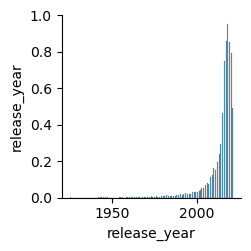

In [213]:
sns.pairplot(df)

# Prepare Data for ML Model

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
 12  iso_alpha     6535 non-null   object
dtypes: int64(1), object(12)
memory usage: 894.6+ KB


In [215]:
df.duplicated().sum()


0

In [216]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,iso_alpha
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",USA


In [217]:
df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
iso_alpha       2272
dtype: int64

In [218]:
df.drop(columns=['show_id','country',"title",'director','cast','description'],axis=1 , inplace=True)

In [219]:
df.sample(4)

,type,date_added,release_year,rating,duration,listed_in,iso_alpha
483,Movie,"July 9, 2021",2021,TV-MA,102 min,"Dramas, International Movies, Romantic Movies",None
4091,Movie,"February 21, 2019",2018,TV-MA,139 min,"Dramas, International Movies, Thrillers",KOR
2719,Movie,"April 1, 2020",2020,TV-MA,77 min,Stand-Up Comedy,SWE
7848,Movie,"March 10, 2017",2016,TV-PG,24 min,Documentaries,None


In [220]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce').fillna(pd.Timestamp('2020-01-01'))

In [221]:
df.isnull().sum()

type               0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
iso_alpha       2272
dtype: int64

In [222]:
df.loc[df['duration'].isnull()]

,type,date_added,release_year,rating,duration,listed_in,iso_alpha
5541,Movie,2017-04-04,2017,74 min,NaN,Movies,USA
5794,Movie,2016-09-16,2010,84 min,NaN,Movies,USA
5813,Movie,2016-08-15,2015,66 min,NaN,Movies,USA


In [223]:
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])
df.loc[df['duration'].isnull()]

,type,date_added,release_year,rating,duration,listed_in,iso_alpha


In [224]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day

In [225]:
df.drop(columns=['date_added'] , inplace=True)
df.head()

,type,release_year,rating,duration,listed_in,iso_alpha,year,month,day
0,Movie,2020,PG-13,90 min,Documentaries,USA,2021,9,25
1,TV Show,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",ZAF,2021,9,24
2,TV Show,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",None,2021,9,24
3,TV Show,2021,TV-MA,1 Season,"Docuseries, Reality TV",None,2021,9,24
4,TV Show,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",IND,2021,9,24


In [226]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [227]:
df['type'].replace({'Movie':1, 'TV Show':0} , inplace=True)

In [228]:
df.sample(5)

,type,release_year,rating,duration,listed_in,iso_alpha,year,month,day
4311,0,2018,TV-Y7,8 Seasons,Kids' TV,USA,2018,12,14
5151,1,2017,PG-13,128 min,"Comedies, International Movies",IND,2017,11,27
3999,1,2019,TV-MA,61 min,Stand-Up Comedy,USA,2019,3,19
3334,1,2019,TV-14,119 min,"Action & Adventure, International Movies",IND,2019,11,1
1797,1,2019,TV-MA,117 min,"Dramas, Music & Musicals",AUS,2020,10,24


In [229]:
columns_to_encode = ['rating', 'duration', 'iso_alpha' , 'listed_in']  # Replace with your actual column names

la =  LabelEncoder()
for col in columns_to_encode:
    df[col] = la.fit_transform(df[col])


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   type          8807 non-null   int64
 1   release_year  8807 non-null   int64
 2   rating        8807 non-null   int32
 3   duration      8807 non-null   int32
 4   listed_in     8807 non-null   int32
 5   iso_alpha     8807 non-null   int32
 6   year          8807 non-null   int32
 7   month         8807 non-null   int32
 8   day           8807 non-null   int32
dtypes: int32(7), int64(2)
memory usage: 378.6 KB


In [231]:
x = df.drop('type' , axis=1)
y = df['type']

In [232]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=42 , test_size=.3)

# Models

In [233]:
model1 = DecisionTreeClassifier(criterion= 'entropy' , splitter='best')
model2 = RandomForestClassifier(n_estimators = 1000 , criterion='entropy' )
model3 = GaussianNB()
model4 = SVC()
model5 = XGBClassifier()
model6 = GradientBoostingClassifier()


In [246]:
def model_t(model):
    # Fit the model and predict on training data
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Classification report
    print(classification_report(y_test, y_pred_test))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    print("Confusion Matrix:")
    print(cm)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    print(f"Accuracy on Training Data: {train_accuracy * 100:.2f}%")
    print(f"Accuracy on Test Data: {test_accuracy * 100:.2f}%")
    
    if train_accuracy > test_accuracy + 0.1:
        print("Warning: The model might be overfitting!")
    else:
        print("The model seems to generalize well.")
        
    scores = cross_val_score(model, x, y, cv=5) 


    print("Cross-Validation Scores:", scores)
    print("Mean Cross-Validation Score:", scores.mean())
    
    # Extract TN, FP, FN, TP from confusion matrix for binary classification
    if len(cm) == 2:  # Check if it's binary classification
        tn, fp, fn, tp = cm.ravel()
        cm_labels = np.array([["TN: {}".format(tn), "FP: {}".format(fp)],
                            ["FN: {}".format(fn), "TP: {}".format(tp)]])
    else:
        cm_labels = np.empty_like(cm).astype(str)  # For multi-class, just show the numbers
        for i in range(len(cm)):
            for j in range(len(cm[i])):
                cm_labels[i, j] = f'{cm[i, j]}'
    
    print("Classes in y_test:", set(y_test))
    print("Model name:", str(model)[:-2])

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title('Confusion Matrix with TP, FP, FN, TN')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       807
           1       1.00      1.00      1.00      1836

    accuracy                           1.00      2643
   macro avg       1.00      0.99      0.99      2643
weighted avg       1.00      1.00      1.00      2643

Confusion Matrix:
[[ 799    8]
 [   4 1832]]
Accuracy on Training Data: 100.00%
Accuracy on Test Data: 99.55%
The model seems to generalize well.
Cross-Validation Scores: [0.99262202 0.9954597  0.9971607  0.99545713 0.99659284]
Mean Cross-Validation Score: 0.9954584802129117
Classes in y_test: {0, 1}
Model name: DecisionTreeClassifier(criterion='entropy


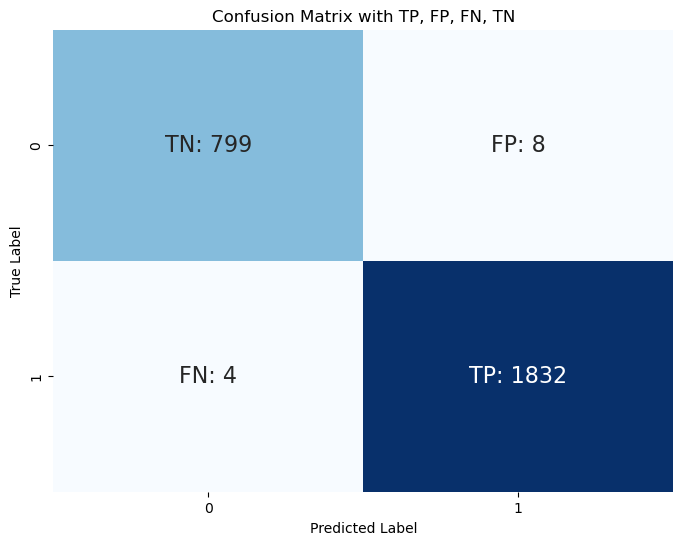

In [249]:
model_t(model1)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       807
           1       0.99      1.00      0.99      1836

    accuracy                           0.99      2643
   macro avg       0.99      0.99      0.99      2643
weighted avg       0.99      0.99      0.99      2643

Confusion Matrix:
[[ 787   20]
 [   2 1834]]
Accuracy on Training Data: 100.00%
Accuracy on Test Data: 99.17%
The model seems to generalize well.
Cross-Validation Scores: [0.98978434 0.98524404 0.96422487 0.98069279 0.98126065]
Mean Cross-Validation Score: 0.9802413369248331
Classes in y_test: {0, 1}
Model name: RandomForestClassifier(criterion='entropy', n_estimators=100


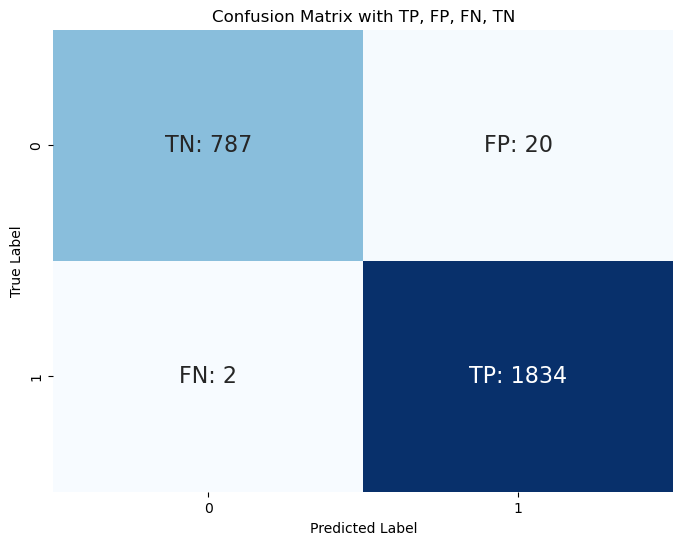

In [250]:
model_t(model2)

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       807
           1       0.88      0.81      0.84      1836

    accuracy                           0.79      2643
   macro avg       0.75      0.77      0.76      2643
weighted avg       0.80      0.79      0.79      2643

Confusion Matrix:
[[ 595  212]
 [ 351 1485]]
Accuracy on Training Data: 77.21%
Accuracy on Test Data: 78.70%
The model seems to generalize well.
Classes in y_test: {0, 1}
Model name: GaussianNB


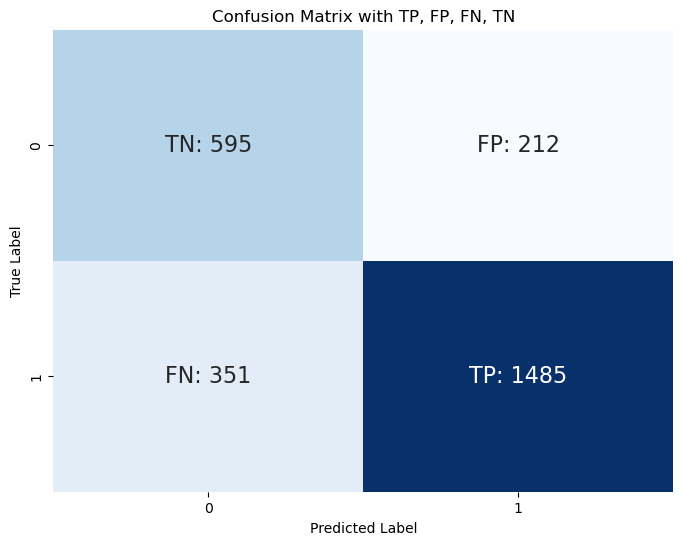

In [243]:
model_t(model3)

              precision    recall  f1-score   support

           0       0.85      0.42      0.56       807
           1       0.79      0.97      0.87      1836

    accuracy                           0.80      2643
   macro avg       0.82      0.69      0.72      2643
weighted avg       0.81      0.80      0.78      2643

Confusion Matrix:
[[ 340  467]
 [  59 1777]]
Accuracy on Training Data: 81.02%
Accuracy on Test Data: 80.10%
The model seems to generalize well.
Classes in y_test: {0, 1}
Model name: SVC


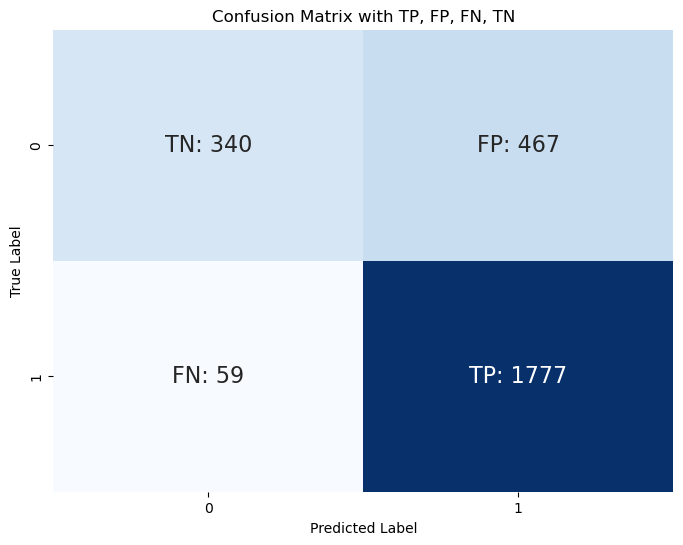

In [244]:
model_t(model4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      1.00      1.00      1836

    accuracy                           1.00      2643
   macro avg       1.00      1.00      1.00      2643
weighted avg       1.00      1.00      1.00      2643

Confusion Matrix:
[[ 803    4]
 [   0 1836]]
Accuracy on Training Data: 100.00%
Accuracy on Test Data: 99.85%
The model seems to generalize well.
Classes in y_test: {0, 1}
Model name: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
     

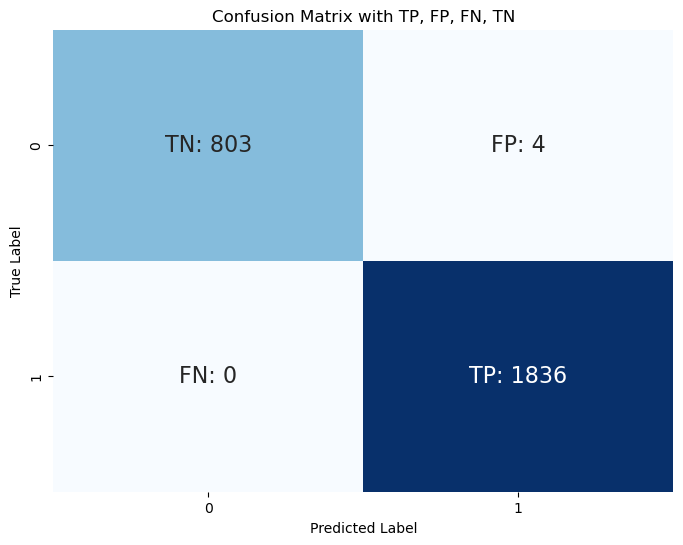

In [245]:
model_t(model5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      1.00      1.00      1836

    accuracy                           1.00      2643
   macro avg       1.00      1.00      1.00      2643
weighted avg       1.00      1.00      1.00      2643

Confusion Matrix:
[[ 804    3]
 [   0 1836]]
Accuracy on Training Data: 99.89%
Accuracy on Test Data: 99.89%
The model seems to generalize well.
Cross-Validation Scores: [0.99943246 0.99772985 0.99886428 0.99488927 0.99375355]
Mean Cross-Validation Score: 0.9969338827580294
Classes in y_test: {0, 1}
Model name: GradientBoostingClassifier


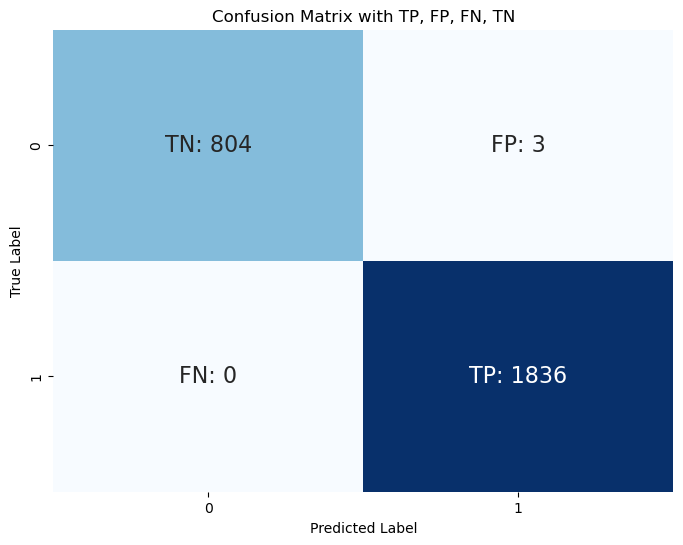

In [251]:
model_t(model6)